<a href="https://colab.research.google.com/github/Jhonata-Tirloni/airbnb-RiodeJaneiro-imoveis/blob/main/Airbnb_Analise_de_imoveis_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analise de Dados - Imoveis Airbnb Rio de Janeiro**

  O Airbnb é considerado a maior empresa de hotelaria atualmente. Com uma abordagem disruptiva nos aluguéis de imóveis para viajantes, a empresa os conecta a anfitriões em várias regiões do mundo que estejam dispostos a alugar seus imóveis para temporadas de estadia. 

  Até o final de 2018, a empresa ja havia hospedado mais de 300 milhões de viajantes em todo o mundo! E no final de 2019 já eram mais de 500 milhões viajantes hospedados ao redor do globo.
  
  Através de uma iniciativa de disponibilização de dados da empresa (que podem ser encontrados atraves [deste link](http://insideairbnb.com/get-the-data.html)) sobre seus imóveis nas mais variadas regiões, **iremos analisar os dados disponibilizados da nossa querida capital carioca Rio de Janeiro!**

## **Objetivo**

Como objetivo deste estudo, espero identificar insights interessantes sobre os imóveis disponibilizados na região do Rio de Janeiro através da apresentação de dados comuns como preço médio de imóveis, dias de estadia, possíveis melhores regiões para estadia e outros.

Através da visualização dos dados em gráficos plotados, também iremos comparar valores e tendências para identificar possíveis padrões interessantes que possam auxilíar novos viajantes que irão para região a ter o melhor custo benefício em sua estadia.


## **Obtenção dos dados**

Novamente, todos os dados foram retirados do site oficial do Airbnb, que pode ser acessando clicando [aqui](http://insideairbnb.com/get-the-data.html).

Iremos utilizar o seguinte arquivo:


*   *listings.csv - Summary information and metrics for listings in Rio de Janeiro (good for visualizations).*



In [1]:
# Importacao das bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alinhamento dos graficos na tela
%matplotlib inline

In [2]:
# Importando a base de dados a partir da fonte citada anteriormente
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv")

## **Exploração dos dados**

Nesta etapa iremos explorar, de forma simples e concisa, os dados disponibilizados pela empresa e carregados anteriormente. A intensão é poder identificarmos as features e atributes do banco de dados, bem como a estrutura de suas variáveis.

### **Dicionário de Dados**

Confira abaixo o que cada coluna significa dentro da base de dados que iremos analisar!
* **id:** Chave única da base de dados utilizada pelo Airbnb
* **name:** Titulo da pousada que se encontra no Airbnb
* **host_id:** Código único do host da pousada
* **host_name:** Nome do host da pousada
* **neighbourhood_group:** Geocódigo da região da hospedagem gerado através de latitude e longitude
* **neighbourhood:** Vizinhança/bairro que se localiza a hospedagem
* **latitude:** Código geográfico latitudinal da hospedagem
* **longitude:** Código geográfico longitudinal da hospedagem
* **room_type:** Tipo de hospedagem (quarto, apartamento inteiro, casa inteira etc)
* **price:** Preço da diária em moeda local (reais)
* **minimum_nights:** Quantidade minima de noites para ficar na hospedagem
* **number_of_reviews:** Quantidade de reviews que a hospedagem possuí
* **last_review:** Data da última review feita
* **calculated_host_listings_count**: Quantidade de hospedagems que o host possui na região
* **availability_365:** Quantidade de dias que a hospdagem fica disponível para poder ser alugada (não confundir com a qtd. de dias que a mesma fica alugada)
* **number_of_reviews_ltm:** Número de reviews nos últimos 12 meses que a hospedagem teve


### **Q1. Qual a estrutura inicial dos registros da tabela?**

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32,NaN


### **Q2. Como estão estruturados as features e variables, e quantas existem?**

In [4]:
print("Quantidade de features: {}".format(df.shape[0]))
print("Quantidade de variables: {} \n".format(+df.shape[1]))

print("Estrutura das variables presentes:")
df.dtypes

Quantidade de features: 24549
Quantidade de variables: 18 

Estrutura das variables presentes:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [5]:
df.count()

id                                24549
name                              24528
host_id                           24549
host_name                         24534
neighbourhood_group                   0
neighbourhood                     24549
latitude                          24549
longitude                         24549
room_type                         24549
price                             24549
minimum_nights                    24549
number_of_reviews                 24549
last_review                       15588
reviews_per_month                 15588
calculated_host_listings_count    24549
availability_365                  24549
number_of_reviews_ltm             24549
license                               0
dtype: int64

### **Q3. A partir de uma análise rapida, quais os pontos que mais chamam atenção nas variáveis numericas?**

In [6]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,24549.000000,24549.000000,24549.000000,15588.000000,24549.000000,24549.000000,24549.000000
mean,1029.592285,5.092142,14.506416,0.691929,7.066642,218.954907,3.584179
std,5403.742297,21.211509,34.054009,0.935476,20.046954,133.727245,8.345567
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,250.000000,2.000000,0.000000,0.090000,1.000000,86.000000,0.000000
50%,479.000000,3.000000,2.000000,0.310000,1.000000,257.000000,0.000000
75%,900.000000,4.000000,12.000000,0.962500,4.000000,355.000000,3.000000
max,650476.000000,1000.000000,504.000000,21.790000,176.000000,365.000000,267.000000


Através das descrições acima, temos pontos interessantes a ser considerados:


1.   O preço médio das pousadas giram em torno de R$ 1.029,59;
2.   O valor alto acima pode ser justificado devido a média do minimo de noites para se hospedar, que giram em torno de 5 noites;
3. Temos um desvio padrão alto de preços de 21 pontos (ou seja, os precos são bem dispersos! o que faz sentido devido a região turística de Rio de Janeiro que, geralmente, tem um grande peso no valor de hospedagem! E ainda mais com uma média de pernoites grande como citado anteriormente).
4. As hospedagems possuem uma média de 14 reviews no geral, porém com uma média de menos de uma review por mês (aparentemente viajantes são meio timidos com suas opiniões ☺)
5. As hospedagens ficam disponíveis, em média, 218 dias no ano! Um número ótimo considerando que várias pousadas no Rio de Janeiro geralmente ficam disponíveis apenas para aluguéis em temporadas específicas.



## **Visualizações (análises gráficas)** 

Que tal começarmos a plotar alguns gráficos para identificarmos como essas pousadas se comportam comparadas umas as outras? Vamos lá!



### **Q1. Quais os tipos de hospedagems e quantas temos em cada categoria?**

[Text(0, 0, '18564'), Text(0, 0, '5415'), Text(0, 0, '494'), Text(0, 0, '76')]

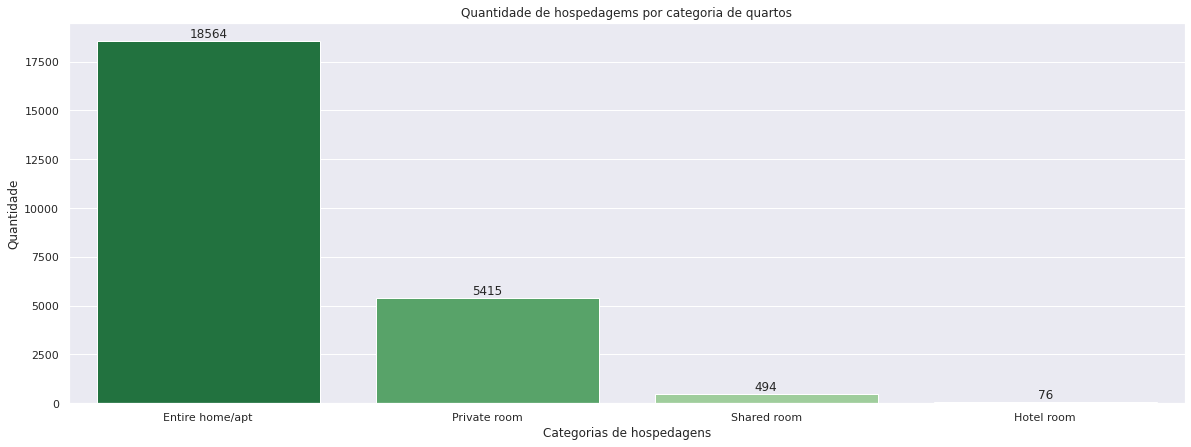

In [77]:
p1 = sns.countplot(x=df['room_type'], palette='Greens_r')
plt.title('Quantidade de hospedagems por categoria de quartos')
plt.xlabel('Categorias de hospedagens')
plt.ylabel('Quantidade')
p1.bar_label(p1.containers[0])

Como podemos perceber pelo gráfico acima, a maioria esmagadora de hospedagem trata-se de casas ou apartamentos inteiros! Seguido por quartos privados, quartos compartilhados e, por ultimo, quartos de hotel.

Outro ponto bem interessante sobre esse gráfico é poder perceber como a Airbnb consegue inverter o mercado. Quebrando os antigos paradigmas do grande mercado de hotelaria, no Airbnb 75,62% de todas as opções tratam-se de casas ou apartamentos inteiros. Ainda mais interessante é saber que apenas 0.003% de todas suas opções no Rio de Janeiro são apenas quartos de hotéis.

Comparando-se com uma hotelaria tradicional, o AirBNB veio para mostrar como se deve inovar em hospedagems!

### **Q2. Quantas hospedagens temos por vizinhança?**

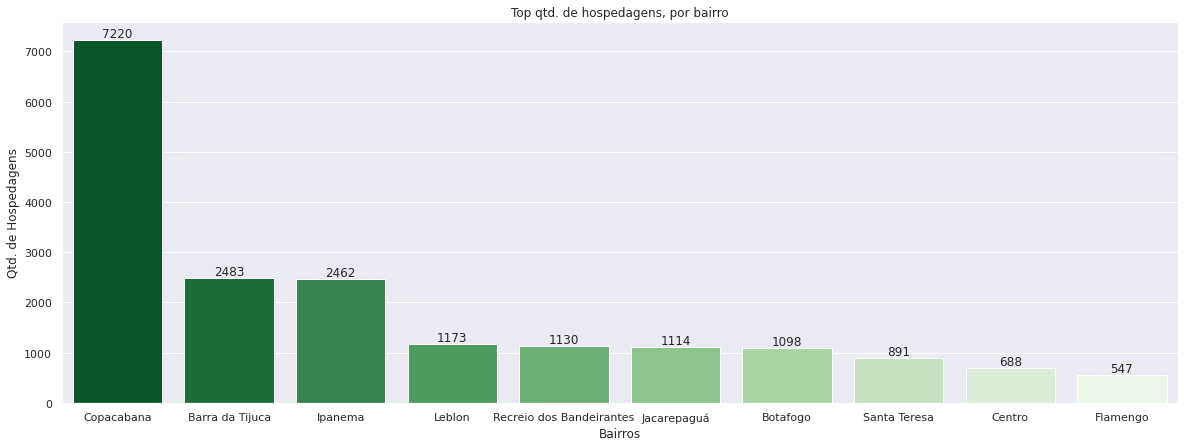

In [75]:
neighbourhood_selected = df.groupby('neighbourhood', as_index=False).count()
neighbourhood_selected = neighbourhood_selected.sort_values(by='id',ascending=False)
neighbourhood_selected = neighbourhood_selected[:10]


p2 = sns.barplot(x=neighbourhood_selected['neighbourhood'], y=neighbourhood_selected['id'], palette='Greens_r')
plt.xlabel('Bairros')
plt.ylabel('Qtd. de Hospedagens')
plt.title('Top qtd. de hospedagens, por bairro')
p2.bar_label(p2.containers[0])

sns.set(rc={'figure.figsize':('20,7')})

Aqui temos um top 10 dos bairros com maior quantidade de hospedagens disponíveis. Naturalmente, os bairros de maior incidência turística são os que mais possuem hospdagens disponíveis para aluguel. 

Assim, os três bairros com maior prefrência são aqueles que possuem vistas e localizações diretas com o mar! Se quiser pegar um sol e se bronzear no calorzão de RJ, prefira os bairros demonstrados no gráfico acima. 

Importante notar que vale uma pesquisa sobre periculisdade da região! Jacarepaguá, por exemplo, possui regiões que são mais distantes de vistas para a praia e até mesmo já levou titulo de bairro mais perigoso de RJ.

### **Q2. Qual a variação dos preços?**

In [92]:
neighbourhood_selected['price'].describe()

count      10.000000
mean     1880.600000
std      1990.377753
min       547.000000
25%       942.750000
50%      1122.000000
75%      2139.750000
max      7220.000000
Name: price, dtype: float64

Pela tabela acima, podemos perceber que dentro o top 10 bairros que selecionamos anteriormente, a média de preços é de **R$1.880,60**, o que é um preço um pouco alto.

Outro detalhe interessante é que o mais barato gira em torno de **R\$ 547,00** e o mais caro **R$7.220,00**. Assim, vale ressaltar a importância da pesquisa de hotelarias dentro do app! Com um desvio padrão de incriveis 1990 (nos indicando o quanto a variação de preços é grande), é extremamente recomendável comparar os valores antes de selecionar um local apenas pelo nome ou indicações. Os preços variam da terra até a lua!

## **Conclusão**

Como podemos perceber, o Airbnb vem transformando todo o negócio de hotelaria nos locais em que se encontra! No Rio de Janeiro, foco dos nosso estudo descritivo aqui, existem diversas hospedagems das mais variadas categorias, locais, preços e modelos! 

A alguns anos atrás, o modelo de hotelaria continuava engessado no famoso modelo de quarto. Hoje através do Airbnb conseguimos locar apartamentos, casas e até mesmo quartos tradicionais por maiores quantidades de dias e, muitas vezes, preços mais baratos do que a concorrência.

Mas, como nem tudo são flores, também pudemos perceber neste estudo que é de extrema importância pesquisar e comparar os preços antes de qualquer locação. Devido ao tipo e categoria da hospedagem, pode-se economizar muito e aproveitar mais ainda se alocando em bairros privilegiados selecionados.

Sem dúvidas, Rio de Janeiro é uma cidade maravilhosa e, certamente, cheia de oportunidades! Vale a visita!



---



E aqui concluímos nosso estudo! ✅